In [23]:
import numpy as np
iris_data = np.loadtxt('data/irisdata.txt', comments="%")
x = iris_data[0:50, 0:4]

# checking data dimensions
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")


Number of features: 4 and number of observations: 50


In [24]:
# Exploring the data
# vectors of individual features
sepal_length = x[:, 0]
sepal_width = x[:, 1]
petal_length = x[:, 2]
petal_width = x[:, 3]

#computed variance
var_sepal_length = sepal_length.var(ddof=1)
var_sepal_width = sepal_width.var(ddof=1)
var_petal_length = petal_length.var(ddof=1)
var_petal_width = petal_width.var(ddof=1)

print(f"Variance of sepal length: {var_sepal_length}")
print(f"Variance of sepal width: {var_sepal_width}")
print(f"Variance of petal length: {var_petal_length}")
print(f"Variance of petal width: {var_petal_width}")

Variance of sepal length: 0.12424897959183677
Variance of sepal width: 0.1436897959183674
Variance of petal length: 0.030159183673469384
Variance of petal width: 0.01110612244897959


# Variance vs. Covariance

## 🔹 Variance
- **Definition:** A measure of how much a single variable spreads out around its mean.  
- **Formula (for a variable X):**
\[
\text{Var}(X) = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2
\]
- **Intuition:**
  - If all values of \(X\) are close to the mean → low variance.
  - If they are spread out → high variance.
- **Example:** For people’s heights, variance tells you how much individual heights differ from the average height.

---

## 🔹 Covariance
- **Definition:** A measure of how two variables change together.  
- **Formula (for variables X and Y):**
\[
\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
\]
- **Intuition:**
  - **Positive covariance:** When \(X\) is above its mean, \(Y\) tends to be above its mean (they move together).
  - **Negative covariance:** When \(X\) is above its mean, \(Y\) tends to be below its mean (they move oppositely).
  - **Covariance ≈ 0:** No consistent relationship.

---

## 🔹 Relationship
- Variance is a **special case of covariance**:
\[
\text{Var}(X) = \text{Cov}(X, X)
\]

---

## 🔹 Visual intuition
- **Variance:** Spread along one axis.  
- **Covariance:** Whether clouds of points tilt together in 2D space.  

Example: Scatterplot of height vs. weight:  
- Taller people tend to weigh more → positive covariance.  
- Taller people tend to weigh less → negative covariance.  
- No relationship → covariance ≈ 0.  

In [25]:
# computed covariance between lepal length and sepal width
cov_sepal_length_width = np.cov(sepal_length, sepal_width, ddof=1)[0, 1]
print(f"Covariance between sepal length and sepal width: {cov_sepal_length_width}")     

#and using $$\sigma^2 = \frac{1}{N-1} \sum_i a_i b_i$$
cov_sepal_length_width_manual = np.sum((sepal_length - sepal_length.mean()) * (sepal_width - sepal_width.mean())) / (n_obs - 1)
print(f"Covariance between sepal length and sepal width (manual calculation): {cov_sepal_length_width_manual}")


Covariance between sepal length and sepal width: 0.09921632653061224
Covariance between sepal length and sepal width (manual calculation): 0.09921632653061223


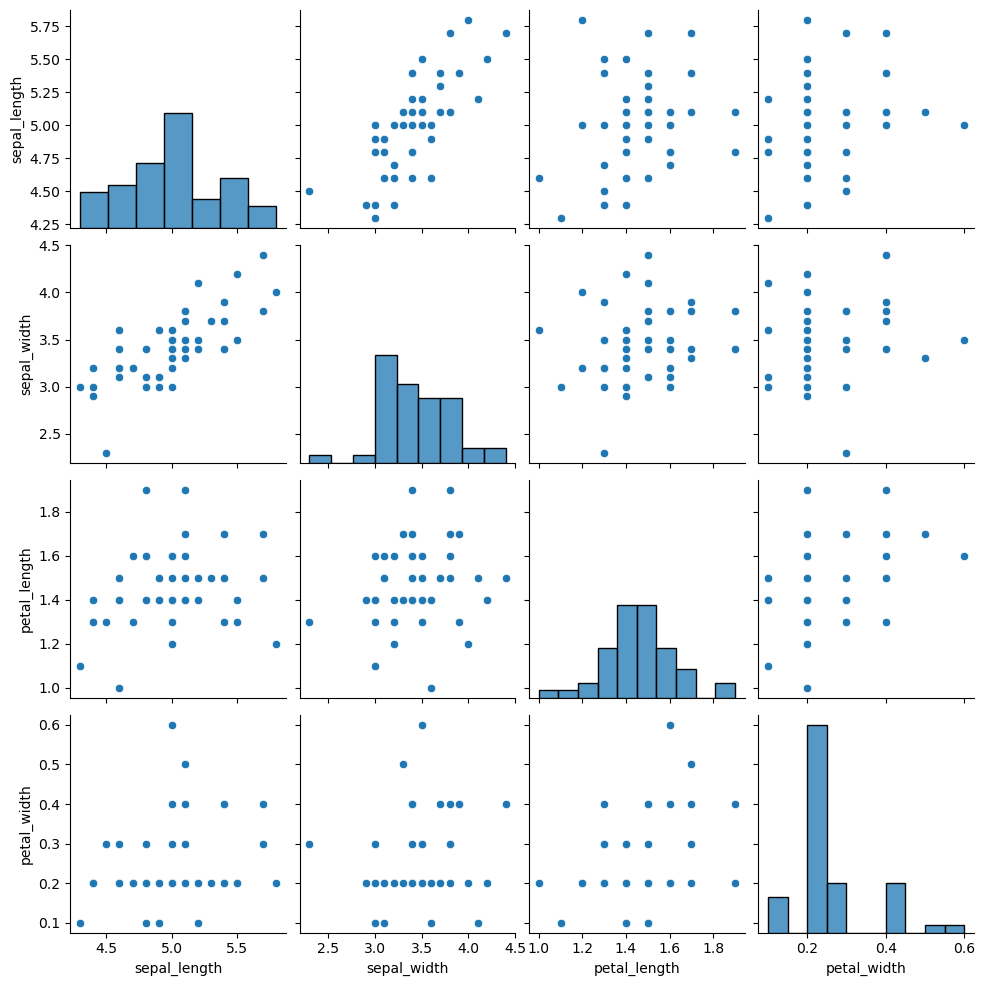

In [26]:
#graphical exploration using seaborn and pandas
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# transform data to pandas dataframe
d = pd.DataFrame(x, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
                             
sns.pairplot(d)
plt.show()

measures/variables of the flower that are related:
- sepal_width and sepal_lenght

the rest is not really that related.. Meaning: no trends to be seen. 

The histograms also tells that the petal lenght and width is very limited. 

In [27]:
# PCA - Principal Component Analysis

# First as manual steps:

# Assume x is data matrix, shape (n_samples, n_features)
# Step 1: subtract the mean (centering)
mn = np.mean(x, axis=0)
data = x - mn

# Step 2: compute covariance matrix manually
# Cx = (1 / (N-1)) * X^T X
N = data.shape[0]
C_manual = (1 / (N - 1)) * np.matmul(data.T, data)

# Step 3: compute covariance matrix using numpy
C_np = np.cov(data, rowvar=False)  # rowvar=False → features in columns

# Step 4: verify they are equal (within rounding error)
print("Manual covariance:\n", C_manual)
print("np.cov covariance:\n", C_np)
print("Difference:\n", C_manual - C_np)

# Step 5: eigen decomposition (PCA directions and variances)
# Knowing that the data is symmetric, we can use np.linalg.eigh.
eigvals, eigvecs = np.linalg.eigh(C_manual)

# Sort eigenvalues/vectors descending
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("Eigenvalues (variance explained):", eigvals)
print("Eigenvectors (principal components):\n", eigvecs)


Manual covariance:
 [[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]
np.cov covariance:
 [[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]
Difference:
 [[-1.52655666e-16 -4.16333634e-17  0.00000000e+00 -3.46944695e-18]
 [-4.16333634e-17 -5.55111512e-17 -3.46944695e-18  5.20417043e-18]
 [ 0.00000000e+00 -3.46944695e-18  2.42861287e-17  0.00000000e+00]
 [-3.46944695e-18  5.20417043e-18  0.00000000e+00  1.73472348e-18]]
Eigenvalues (variance explained): [0.23645569 0.03691873 0.0267964  0.00903326]
Eigenvectors (principal components):
 [[-0.6690784  -0.59788401  0.43996277 -0.03607712]
 [-0.73414783  0.62067342 -0.27460747 -0.01955027]
 [-0.0965439  -0.49005559 -0.8324495  -0.23990129]
 [-0.06356359 -0.13093791 -0.

examine some properties of the principal components. First find out how much of the total variation the first component explains.

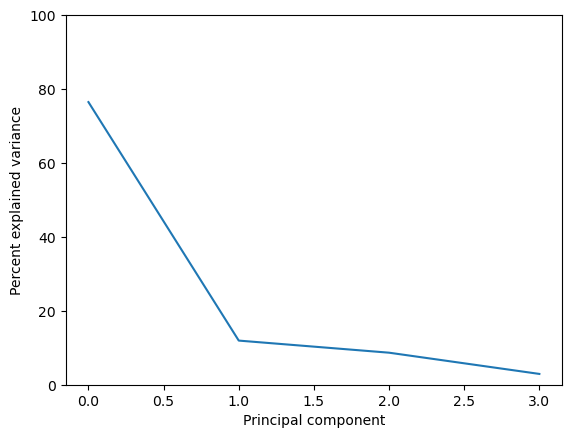

In [28]:
# plotting the amount of variance explained by each principal component
values, vectors = np.linalg.eig(C_manual)
v_norm = values / values.sum() * 100
plt.plot(v_norm)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])

plt.show()

Explained variance (%): [76.47237023 11.93992401  8.66624997  2.92145579]
First component explains 76.47%


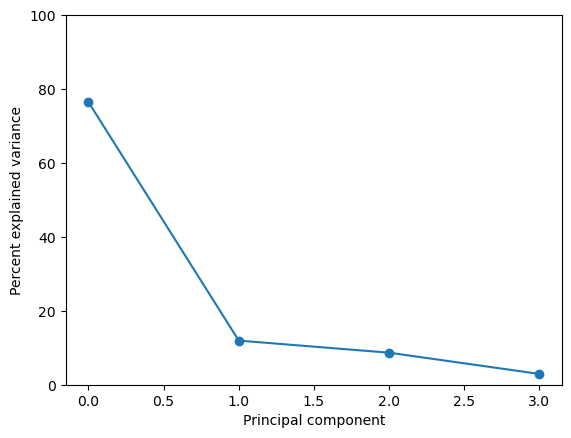

In [29]:
# Or 
v_norm = values / values.sum() * 100
print("Explained variance (%):", v_norm)
print("First component explains %.2f%%" % v_norm[0])

plt.plot(v_norm, marker='o')
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])
plt.show()


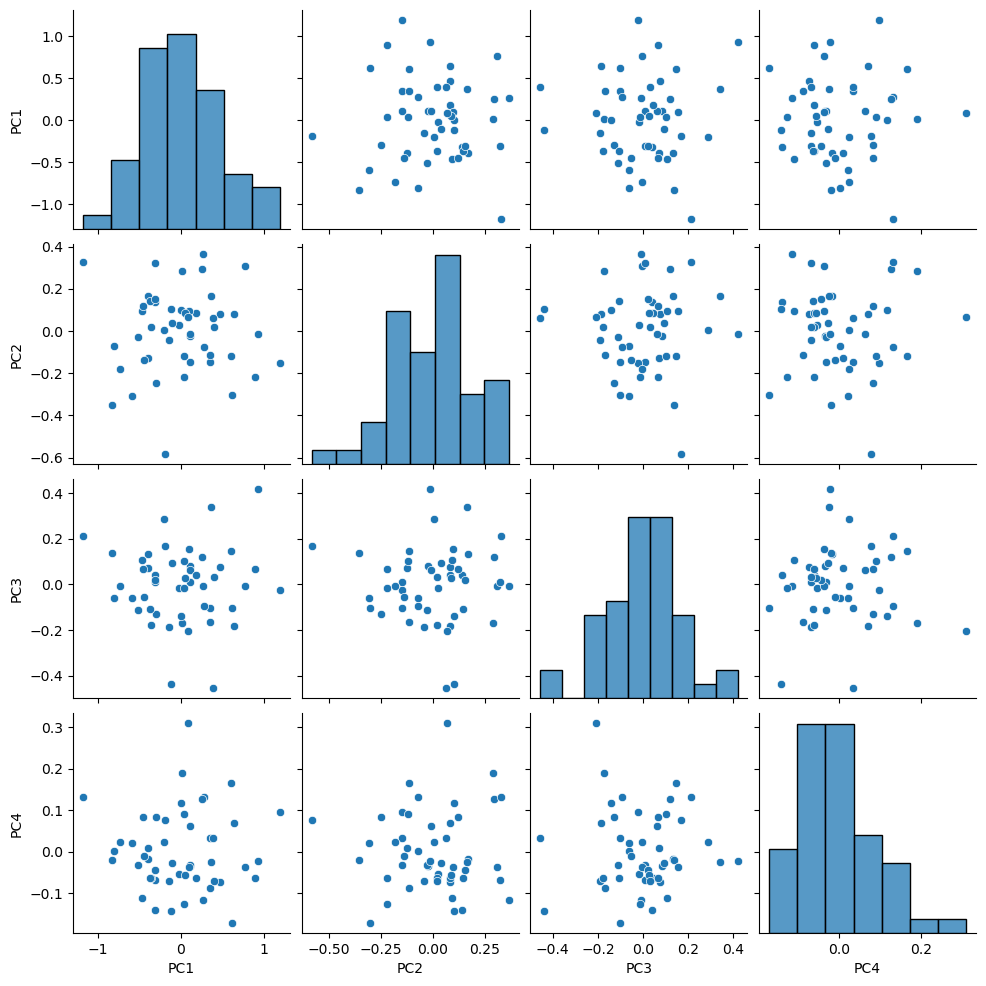

In [30]:
#The new coordinates (scores) are computed by projecting the mean-centered data onto the eigenvectors:

pc_proj = vectors.T.dot(data.T)   # shape (n_components, n_samples)
pc_proj = pc_proj.T               # transpose back to (n_samples, n_components)

# Put into a dataframe
import pandas as pd
import seaborn as sns
df_proj = pd.DataFrame(pc_proj, columns=[f'PC{i+1}' for i in range(pc_proj.shape[1])])

sns.pairplot(df_proj)
plt.show()

The pairplot now shows the decorrelated structure:

Off-diagonal plots will look much less correlated.

Variance is concentrated in PC1, so along PC1 you’ll see the most spread.

The covariance matrix of the projected data is diagonal (only variances, no covariances).


In [31]:
# Direct PCA with sklearn
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(x)  # x is the original data (no mean subtraction needed)

values_pca = pca.explained_variance_        # same as eigenvalues
exp_var_ratio = pca.explained_variance_ratio_ # normalized percentages
vectors_pca = pca.components_               # principal component vectors
data_transform = pca.transform(x)           # projected data

Compare:

values_pca ≈ your eigenvalues (maybe tiny floating-point differences).

exp_var_ratio ≈ your v_norm / 100.

vectors_pca = eigenvectors — but note:

In sklearn, components_ has shape (n_components, n_features).

In your manual PCA, vectors was (n_features, n_components).

So it’s essentially transposed.

data_transform = your pc_proj.T (same scores, just different orientation depending on convention).

Theory summary:

-PCA always boils down to eigen-decomposition of the covariance matrix.

-The proportion of variance tells you how many PCs to keep.

-Projection makes features uncorrelated (covariance matrix diagonal).

-Libraries like sklearn automate mean-centering and ordering of eigenvalues/vectors, but results are mathematically equivalent to your manual approach.

In [32]:
# Keeping only the main components
# We already have:
# - data (mean-centered original data)
# - vectors (eigenvectors, shape (features, components))
# - eigvals (eigenvalues)
# - mn (mean of original data)

# Step 1: Project onto first 2 PCs
proj_2d = data.dot(vectors[:, :2])   # shape (n_samples, 2)

# Step 2: Reconstruct back to original space (approximation)
reconstructed = proj_2d.dot(vectors[:, :2].T) + mn  # add mean back

print("Original shape:", data.shape)
print("Reconstructed shape:", reconstructed.shape)

# Step 3: Compare to original (just to see how close)
error = np.mean((x - reconstructed) ** 2)
print("Mean squared reconstruction error:", error)


Original shape: (50, 4)
Reconstructed shape: (50, 4)
Mean squared reconstruction error: 0.008778266498999938


Why is the shape still (50, 4)?

The dataset has 50 samples and 4 original variables.
- PCA compression step: (50, 4) → (50, 2)
- Reconstruction step: (50, 2) → (50, 4)

The reconstructed 4D points are the best 4D approximations of the originals, using only the information in the first 2 PCs.

What the error means:
- MSE ≈ 0.0088 → on average, you lose that much variance per entry when dropping PC3 + PC4.

Matches the explained variance numbers:
- PC1 + PC2 captured ~88% of the variance.

Yhe “lost” ~12% → which shows up as reconstruction error.

Intuition:
Think of PCA like compressing an MP3 file 🎵:
- Original music = 4D data.
- Keeping only the main frequencies (PC1 + PC2).

When reconstructing, we still get “music” in the same format (4 channels), but some details are missing.

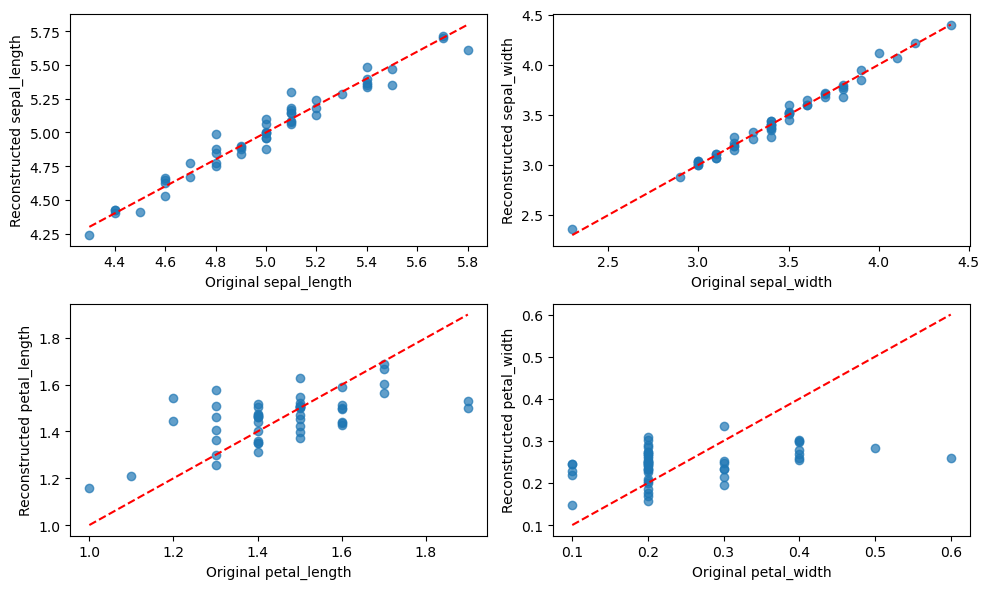

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, ax in enumerate(axes.flat):
    ax.scatter(x[:, i], reconstructed[:, i], alpha=0.7)
    ax.set_xlabel("Original " + cols[i])
    ax.set_ylabel("Reconstructed " + cols[i])
    ax.plot([x[:, i].min(), x[:, i].max()],
            [x[:, i].min(), x[:, i].max()],
            'r--')  # diagonal line for reference

plt.tight_layout()
plt.show()
